product url:
https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WA2I5RG&marketplace=FLIPKART

In [122]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [123]:
headers={'User-Agent': 'Use your own user agent',
    'Accept-Language': 'en-us,en;q=0.5'}

In [124]:
customer_names = []
review_title = []
ratings = []
comments = []

In [125]:
for i in range(1, 44):
    # Construct the URL for the current page
    url ="https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WA2I5RG&marketplace=FLIPKART"
 
     # GET request to the page
    page = requests.get(url)
    data=page.content
    # parse the html content
    soup = bs(data,"html.parser")

    # extraxt customer name
    names = soup.find_all("p", class_="_2sc7ZR _2V5EHH" )
    for name in names:
        i  = name.get_text()
        customer_names.append(i)
    
    # extracting review titles:
    title = soup.find_all('p',class_ = "_2-N8zT")
    for i in title:
        t=i.get_text()
        review_title.append(t)

    #ratings:
    rat = soup.find_all("div",class_ = "_3LWZlK _1BLPMq")
    for r in rat:
        rating = r.get_text()
        if rating:
            ratings.append(rating)
        else:
            ratings.append("0")  # null ratings
   
    # comments
    cmt = soup.find_all("div",class_ ="t-ZTKy")
    for c in cmt:
        comments_text = c.div.div.get_text(strip=True)
        comments.append(comments_text)




In [126]:
# Ensure all lists have the same length
min_length = min(len(customer_names), len(review_title), len(ratings), len(comments))
customer_names = customer_names[:min_length]
review_title = review_title[:min_length]
ratings = ratings[:min_length]
comments = comments[:min_length]

In [127]:
data = {
'Customer_Name': customer_names,
'Review_Title': review_title,
'Rating': ratings,
'Comment': comments
}
df = pd.DataFrame(data)

In [128]:
df

,Customer_Name,Review_Title,Rating,Comment
0,Ajin V,Mind-blowing purchase,5,High quality camera😍
1,Mousam Guha Roy,Good choice,4,Very nice
2,Prithivi Boruah,Just wow!,5,Camera Quality Is Improved Loving It
3,Sheetla Prasad Maurya,Worth the money,4,Best mobile phoneCamera quality is very niceBa...
4,Rahul Shedge,Brilliant,5,Totally happy!Camera 5Battery 5Display 5Design 5
...,...,...,...,...
425,Raj Singh,Simply awesome,5,for me its 10 out of 10✨
426,Yadu krishnan,Excellent,5,Awesome experience. thanks to flipkart
427,Ankit Verma,Really Nice,4,Awesome camra quality superb camra 😊
428,Suman Jain,Best in the market!,5,Simply Awesome 🤩


In [129]:


print(len(customer_names))
print(len(review_title))
print(len(ratings))
print(len(comments))



430
430
430
430


In [130]:

import pandas as pd
data = {
    'Customer_Name': customer_names,
    'Review_Title': review_title,
    'Rating': ratings,
    'Comment': comments
}

In [131]:
df.isnull().sum()

Customer_Name    0
Review_Title     0
Rating           0
Comment          0
dtype: int64

In [132]:
df = pd.DataFrame(data)
# df['Rating'].fillna(0, inplace=True)

In [133]:
# Save the DataFrame to a CSV file
df.to_csv(' APPLE iPhone 15 (Black, 128 GB).csv', index=False)

Load data set

In [134]:
reviews=pd.read_csv(r"D:\data_science_4h\ APPLE iPhone 15 (Black, 128 GB).csv")

In [135]:
reviews.shape

(430, 4)

In [136]:
reviews.head()

,Customer_Name,Review_Title,Rating,Comment
0,Ajin V,Mind-blowing purchase,5,High quality camera😍
1,Mousam Guha Roy,Good choice,4,Very nice
2,Prithivi Boruah,Just wow!,5,Camera Quality Is Improved Loving It
3,Sheetla Prasad Maurya,Worth the money,4,Best mobile phoneCamera quality is very niceBa...
4,Rahul Shedge,Brilliant,5,Totally happy!Camera 5Battery 5Display 5Design 5


# data exploration

In [137]:
reviews.Rating.describe()

count    430.000000
mean       4.700000
std        0.458791
min        4.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [138]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_Name  430 non-null    object
 1   Review_Title   430 non-null    object
 2   Rating         430 non-null    int64 
 3   Comment        430 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.6+ KB


In [139]:
reviews.isnull().sum()

Customer_Name    0
Review_Title     0
Rating           0
Comment          0
dtype: int64

# data visualization

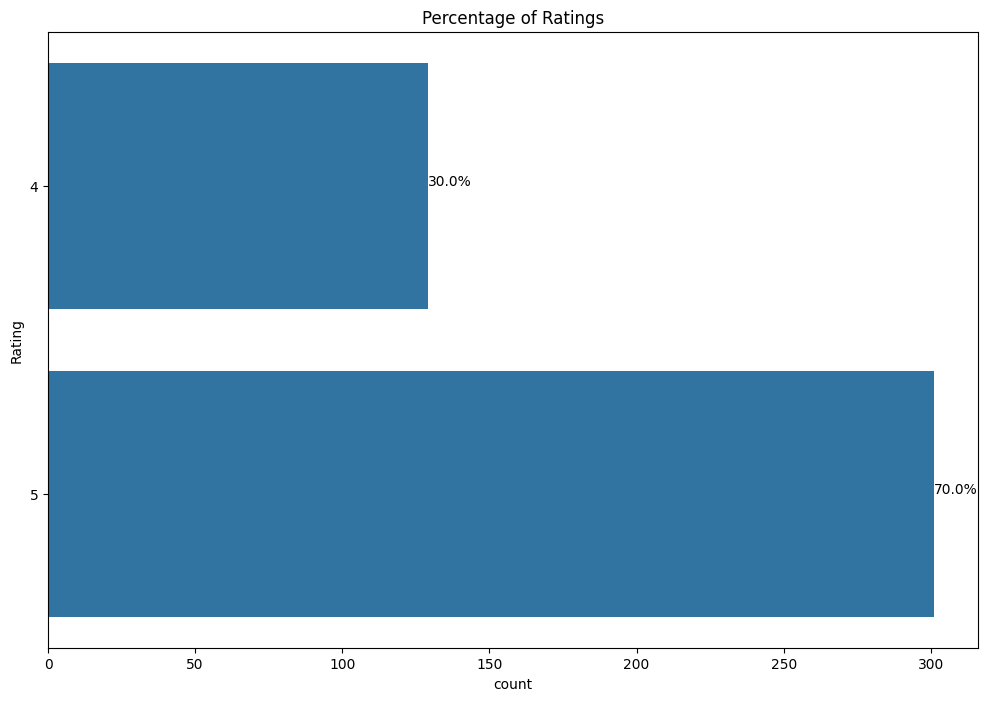

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

 BasicText Preprocessing for Sentiment Analysis

In [141]:
from textblob import TextBlob

In [142]:
reviews['Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                 High quality camera😍
1                                            Very nice
2                 Camera Quality Is Improved Moving It
3    West mobile phoneCamera quality is very niceBa...
4        Totally happy!Camera Battery Display Design 5
Name: Comment, dtype: object

In [143]:
apple_review = reviews[['Comment']]
apple_review

,Comment
0,High quality camera😍
1,Very nice
2,Camera Quality Is Improved Loving It
3,Best mobile phoneCamera quality is very niceBa...
4,Totally happy!Camera 5Battery 5Display 5Design 5
...,...
425,for me its 10 out of 10✨
426,Awesome experience. thanks to flipkart
427,Awesome camra quality superb camra 😊
428,Simply Awesome 🤩


In [144]:
from wordcloud import STOPWORDS,wordcloud
#removing stopwords
from nltk.corpus import stopwords

In [147]:
stop_words = stopwords.words('english')
apple_review['Comment'] = apple_review['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop_words))

C:\Users\91863\AppData\Local\Temp\ipykernel_21356\880009325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_review['Comment'] = apple_review['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop_words))


lemmatizer

In [154]:
import re
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in range(0, len(apple_review)):
    cleaned = re.sub('[^a-zA-Z]', " ", apple_review["Comment"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

In [155]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": apple_review.Comment})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5


# preprocessing

In [156]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [158]:
import numpy as np
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
5,,10 10✨
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.


Removing links (http | https)

In [159]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
5,,10 10✨
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.


 Removing Review with empty text

In [160]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.
10,high quality camera,high quality camera😍


 Dropping duplicate rows

In [161]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.
10,high quality camera,high quality camera😍


In [163]:
#Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


In [164]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.
10,high quality camera,high quality camera😍


# removing stopwords

In [166]:
import codecs

In [169]:
with codecs.open(r"C:\Users\91863\Downloads\stop.txt", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [175]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [176]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,high quality camera,high quality camera😍
1,nice,nice
2,camera quality improved loving,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5
6,awesome experience thanks flipkart,awesome experience. thanks flipkart
7,awesome camra quality superb camra,awesome camra quality superb camra 😊
8,simply awesome,simply awesome 🤩
9,simply premium,simply premium.
10,high quality camera,high quality camera😍


In [177]:
# tokenize
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['nice'])

In [178]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0                               [high, quality, camera]
1                                                [nice]
2                   [camera, quality, improved, loving]
3     [best, mobile, phonecamera, quality, nicebatte...
4     [totally, happy, camera, battery, display, des...
6               [awesome, experience, thanks, flipkart]
7              [awesome, camra, quality, superb, camra]
8                                     [simply, awesome]
9                                     [simply, premium]
10                              [high, quality, camera]
Name: Clean_Reviews, dtype: object

In [180]:
import nltk

In [181]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,high quality camera,high quality camera😍,"[high, quality, camera]"
1,nice,nice,[nice]
2,camera quality improved loving,camera quality improved loving,"[camera, quality, improved, loving]"
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...,"[best, mobile, phonecamera, quality, nicebatte..."
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5,"[totally, happy, camera, battery, display, des..."
6,awesome experience thanks flipkart,awesome experience. thanks flipkart,"[awesome, experience, thanks, flipkart]"
7,awesome camra quality superb camra,awesome camra quality superb camra 😊,"[awesome, camra, quality, superb, camra]"
8,simply awesome,simply awesome 🤩,"[simply, awesome]"
9,simply premium,simply premium.,"[simply, premium]"
10,high quality camera,high quality camera😍,"[high, quality, camera]"


converting to stemmer

In [189]:
!pip install  SnowballStemmer



In [191]:
from nltk import SnowballStemmer
stemmer = SnowballStemmer("english")

In [192]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,high qualiti camera
1,nice
2,camera qualiti improv love
3,best mobil phonecamera qualiti nicebatteri bac...
4,total happi camera batteri display design
...,...
424,total happi camera batteri display design
426,awesom experi thank flipkart
427,awesom camra qualiti superb camra
428,simpli awesom


In [193]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,high quality camera
1,nice
2,camera quality improved loving
3,best mobile phonecamera quality nicebattery ba...
4,totally happy camera battery display design
...,...
424,totally happy camera battery display design
426,awesome experience thanks flipkart
427,awesome camra quality superb camra
428,simply awesome


# feature extraction

In [196]:
from sklearn.feature_extraction.text import CountVectorizer 

In [197]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [200]:
print(cv.get_feature_names_out()[:])

['amazing' 'awesome' 'backup' 'battery' 'best' 'camera' 'camra' 'design'
 'display' 'experience' 'flipkart' 'goodsound' 'happy' 'high' 'improved'
 'loving' 'mobile' 'nice' 'nicebattery' 'phonecamera' 'premium' 'quality'
 'simply' 'superb' 'thanks' 'totally']


In [201]:
print(tweetscv.toarray()[:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# ngrams

In [202]:
dataframe = dataframe.reset_index(drop=True)

In [205]:
from nltk import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataframe)):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [211]:
corpus[4:10]

['total happi camera batteri display design',
 'awesom experi thank flipkart',
 'awesom camra qualiti superb camra',
 'simpli awesom',
 'simpli premium',
 'high qualiti camera']

# applying countvectorizer

In [213]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
x= cv.fit_transform(corpus).toarray()

In [214]:
x.shape

(387, 72)

In [216]:
cv.get_feature_names_out()[:20]

array(['amaz', 'awesom', 'awesom camra', 'awesom camra qualiti',
       'awesom experi', 'awesom experi thank', 'backup',
       'backup goodsound', 'backup goodsound qualiti', 'batteri',
       'batteri display', 'batteri display design', 'best', 'best mobil',
       'best mobil phonecamera', 'camera', 'camera batteri',
       'camera batteri display', 'camera qualiti',
       'camera qualiti improv'], dtype=object)

In [217]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [220]:
count_df = pd.DataFrame(x, columns=cv.get_feature_names_out())
count_df

,amaz,awesom,awesom camra,awesom camra qualiti,awesom experi,awesom experi thank,backup,backup goodsound,backup goodsound qualiti,batteri,...,simpli,simpli awesom,simpli premium,superb,superb camra,thank,thank flipkart,total,total happi,total happi camera
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
383,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
384,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
385,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


#td-idf

In [222]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataframe)):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [223]:
corpus[5]

'awesom experi thank flipkart'

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
x = tfidf_v.fit_transform(corpus).toarray()

In [228]:
tfidf_v.get_feature_names_out()[:20]

array(['amaz', 'awesom', 'awesom camra', 'awesom camra qualiti',
       'awesom experi', 'awesom experi thank', 'backup',
       'backup goodsound', 'backup goodsound qualiti', 'batteri',
       'batteri display', 'batteri display design', 'best', 'best mobil',
       'best mobil phonecamera', 'camera', 'camera batteri',
       'camera batteri display', 'camera qualiti',
       'camera qualiti improv'], dtype=object)

# NER

In [231]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[:]

'high quality camera nice camera quality improved loving best mobile phonecamera quality nicebattery backup goodsound quality amazing totally happy camera battery display design awesome experience thanks flipkart awesome camra quality superb camra simply awesome simply premium high quality camera nice camera quality improved loving best mobile phonecamera quality nicebattery backup goodsound quality amazing totally happy camera battery display design awesome experience thanks flipkart awesome camra quality superb camra simply awesome simply premium high quality camera nice camera quality improved loving best mobile phonecamera quality nicebattery backup goodsound quality amazing totally happy camera battery display design awesome experience thanks flipkart awesome camra quality superb camra simply awesome simply premium high quality camera nice camera quality improved loving best mobile phonecamera quality nicebattery backup goodsound quality amazing totally happy camera battery displa

In [235]:
! pip install spacy_syllables en_core_web_sm

  Using cached spacy_syllables-3.0.2-py3-none-any.whl (5.1 kB)


ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm


In [245]:
!pip install spacy download en


ERROR: Could not find a version that satisfies the requirement en (from versions: none)
ERROR: No matching distribution found for en


In [247]:
# parts of speech tagging
import spacy


nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

c:\Users\91863\anaconda3\lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [248]:
for token in doc_block[:]:
    print(token,token.pos_)

high ADJ
quality NOUN
camera NOUN
nice ADJ
camera NOUN
quality NOUN
improved VERB
loving VERB
best ADJ
mobile ADJ
phonecamera NOUN
quality NOUN
nicebattery NOUN
backup NOUN
goodsound NOUN
quality NOUN
amazing ADJ
totally ADV
happy ADJ
camera NOUN
battery NOUN
display NOUN
design NOUN
awesome ADJ
experience NOUN
thanks NOUN
flipkart ADJ
awesome ADJ
camra NOUN
quality NOUN
superb NOUN
camra NOUN
simply ADV
awesome ADJ
simply ADV
premium VERB
high ADJ
quality NOUN
camera NOUN
nice ADJ
camera NOUN
quality NOUN
improved VERB
loving VERB
best ADJ
mobile ADJ
phonecamera NOUN
quality NOUN
nicebattery NOUN
backup NOUN
goodsound NOUN
quality NOUN
amazing ADJ
totally ADV
happy ADJ
camera NOUN
battery NOUN
display NOUN
design NOUN
awesome ADJ
experience NOUN
thanks NOUN
flipkart ADJ
awesome ADJ
camra NOUN
quality NOUN
superb NOUN
camra NOUN
simply ADV
awesome ADJ
simply ADV
premium VERB
high ADJ
quality NOUN
camera NOUN
nice ADJ
camera NOUN
quality NOUN
improved VERB
loving VERB
best ADJ
mobile AD

In [249]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['nicebattery', 'backup', 'goodsound', 'quality', 'camera', 'battery', 'display', 'design', 'experience', 'thanks', 'camra', 'quality', 'superb', 'camra', 'premium', 'quality', 'camera', 'camera', 'quality', 'improved', 'loving', 'phonecamera', 'quality', 'nicebattery', 'backup', 'goodsound', 'quality', 'camera', 'battery', 'display', 'design', 'experience', 'thanks', 'camra', 'quality', 'superb', 'camra', 'premium', 'quality', 'camera', 'camera', 'quality', 'improved', 'loving', 'phonecamera', 'quality', 'nicebattery', 'backup', 'goodsound', 'quality', 'camera', 'battery', 'display', 'design', 'experience', 'thanks', 'camra', 'quality', 'superb', 'camra', 'premium', 'quality', 'camera', 'camera', 'quality', 'improved', 'loving', 'phonecamera', 'quality', 'nicebattery', 'backup', 'goodsound', 'quality', 'camera', 'battery', 'display', 'design', 'experience', 'thanks', 'camra', 'quality', 'superb', 'camra', 'premium', 'quality', 'camera', 'camera', 'quality', 'improved', 'loving', 'phon

In [250]:
# Counting the noun & verb tokens
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,quality,215
1,camera,129
2,camra,86
3,improved,43
4,loving,43
5,phonecamera,43
6,nicebattery,43
7,backup,43
8,goodsound,43
9,battery,43


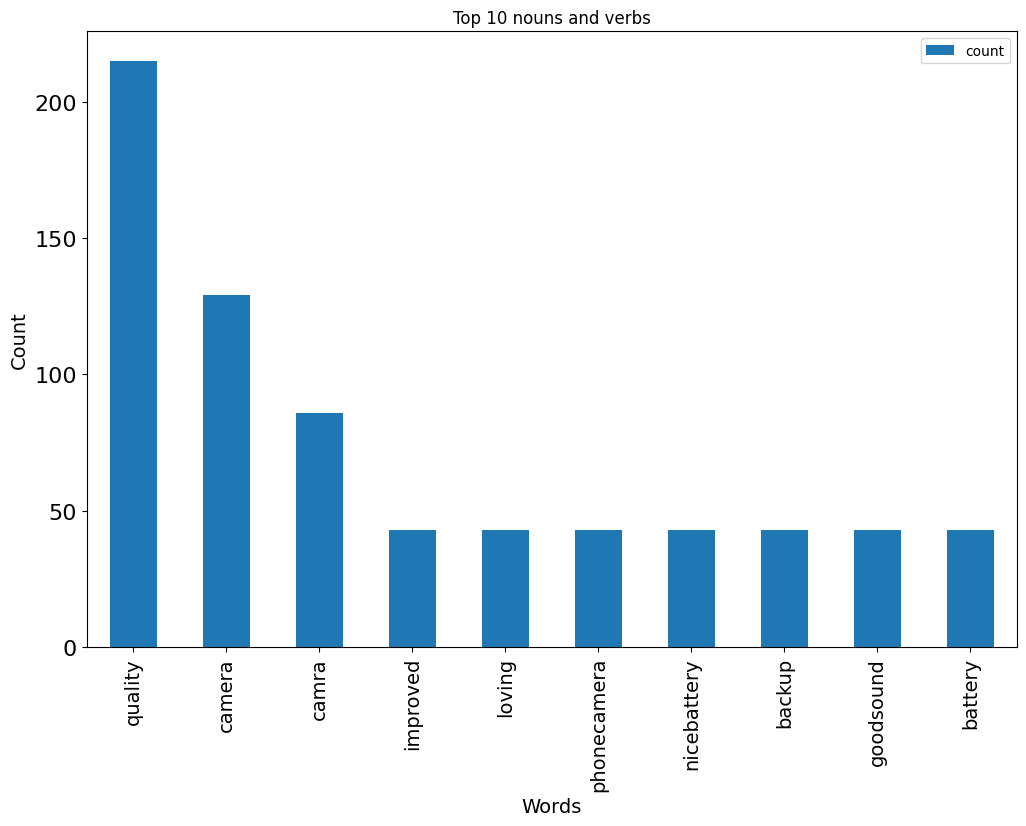

In [251]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [252]:
# BOW Features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [253]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


In [254]:
# Fetch sentiments Using TextBlob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,387


In [255]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,high quality camera,high quality camera😍,"[high, quality, camera]",0.54,0.16
1,nice,nice,[nice],1.00,0.60
2,camera quality improved loving,camera quality improved loving,"[camera, quality, improved, loving]",0.95,0.60
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...,"[best, mobile, phonecamera, quality, nicebatte...",0.60,0.80
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5,"[totally, happy, camera, battery, display, des...",1.00,0.80


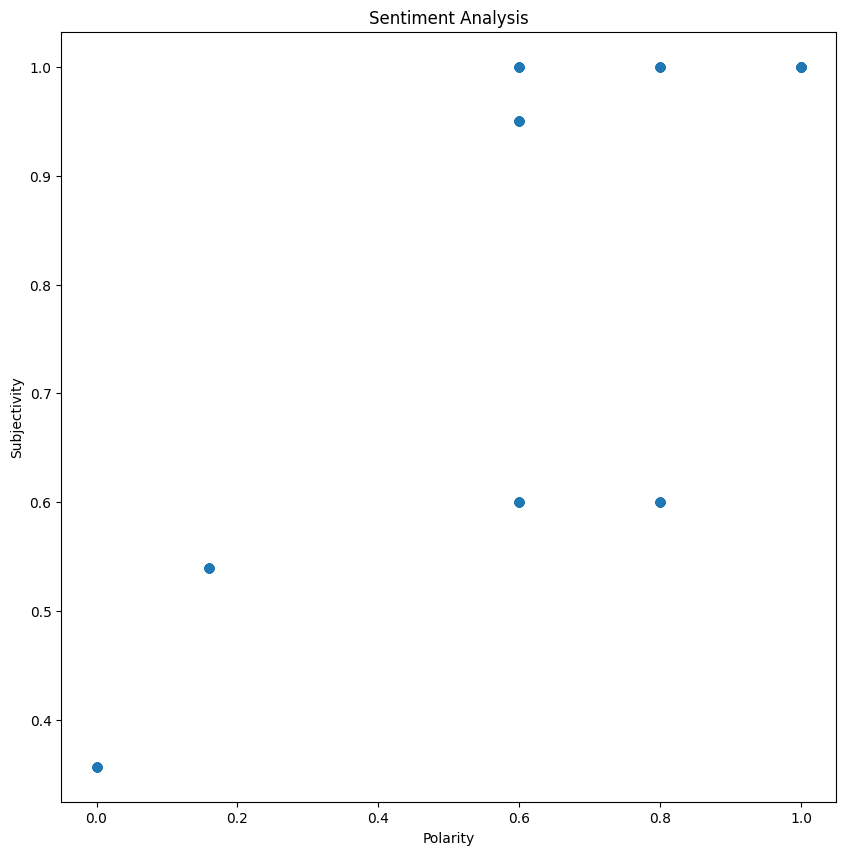

In [258]:
f, axes = plt.subplots(figsize = (10,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [259]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,high quality camera,high quality camera😍,"[high, quality, camera]",0.54,0.16,pos
1,nice,nice,[nice],1.00,0.60,pos
2,camera quality improved loving,camera quality improved loving,"[camera, quality, improved, loving]",0.95,0.60,pos
3,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...,"[best, mobile, phonecamera, quality, nicebatte...",0.60,0.80,pos
4,totally happy camera battery display design,totally happy!camera 5battery 5display 5design 5,"[totally, happy, camera, battery, display, des...",1.00,0.80,pos


In [263]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

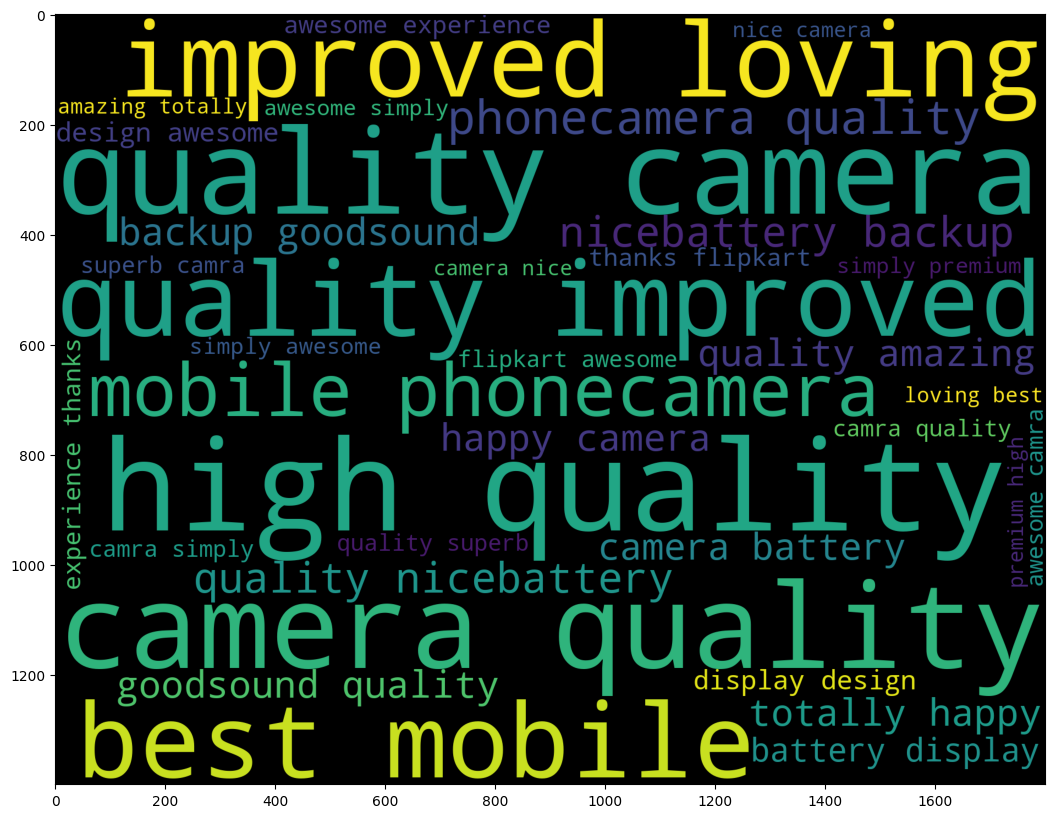

In [264]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [265]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

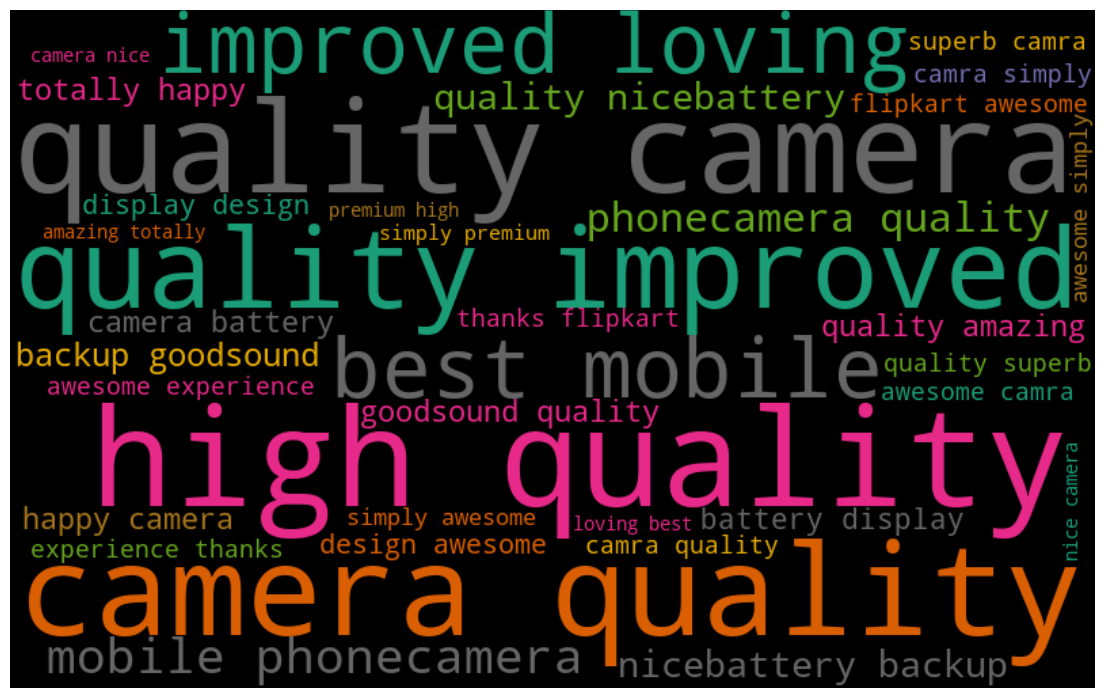

In [266]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)